## 6.6 Sourcing & Analyzing Time-Series Data

## Index
[1. Import Libraries and Datasets](#1.-Import-Libraries-and-Datasets)
<br>
[2. Subsetting, wrangling, and cleaning time-series data](#2.-Subsetting,-wrangling,-and-cleaning-time-series-data)
<br>
[3. Time series analysis: decomposition](#3.-Time-series-analysis:-decomposition)
<br>
[4. Testing for stationarity](#4.-Testing-for-stationarity)
<br>
[5. Stationarizing the Data](#5.-Stationarizing-the-Data)

### 1. Import Libraries and Datasets

In [15]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install quandl

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# import datasets

# create path for dataset 
path = r'C:\Users\pears\Desktop\CF\Achievement 6\datasets'

# create filepaths
filepath = os.path.join(path, '.csv', 'prevelance.csv')

# assign df name
prev = pd.read_csv(filepath)

In [4]:
# viewing df prevelance 

prev.head(5)

,Entity,Year,Unnamed: 2,Anxiety,Depressive
0,Afghanistan,1990,"Afghanistan, 1990",4.8351,5.1253
1,Afghanistan,1991,"Afghanistan, 1991",4.8218,5.1163
2,Afghanistan,1992,"Afghanistan, 1992",4.8014,5.1066
3,Afghanistan,1993,"Afghanistan, 1993",4.7894,5.1003
4,Afghanistan,1994,"Afghanistan, 1994",4.7849,5.0994


In [5]:
prev.shape

(6150, 5)

In [6]:
# isolating depression prevelance for only US

prev_dep_us = prev[prev['Entity'] == 'United States']

In [7]:
prev_dep_us

,Entity,Year,Unnamed: 2,Anxiety,Depressive
5820,United States,1990,"United States, 1990",5.6170,4.0687
5821,United States,1991,"United States, 1991",5.6365,4.1966
5822,United States,1992,"United States, 1992",5.6620,4.3232
5823,United States,1993,"United States, 1993",5.6911,4.4440
5824,United States,1994,"United States, 1994",5.7223,4.5544
5825,United States,1995,"United States, 1995",5.7527,4.6499
5826,United States,1996,"United States, 1996",5.9328,4.7289
5827,United States,1997,"United States, 1997",6.3198,4.7923
5828,United States,1998,"United States, 1998",6.7723,4.8418
5829,United States,1999,"United States, 1999",7.1485,4.8775


In [8]:
# removing irrelevant columns from df 

prev_dep_us = prev_dep_us.drop(columns = ['Unnamed: 2', 'Anxiety', 'Entity'])

In [9]:
prev_dep_us

,Year,Depressive
5820,1990,4.0687
5821,1991,4.1966
5822,1992,4.3232
5823,1993,4.4440
5824,1994,4.5544
5825,1995,4.6499
5826,1996,4.7289
5827,1997,4.7923
5828,1998,4.8418
5829,1999,4.8775


In [10]:
# turning Year column into index 

prev_dep_us.set_index('Year', inplace=True)

In [11]:
prev_dep_us

,Depressive
Year,
1990,4.0687
1991,4.1966
1992,4.3232
1993,4.4440
1994,4.5544
1995,4.6499
1996,4.7289
1997,4.7923
1998,4.8418


In [12]:
prev_dep_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 1990 to 2019
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Depressive  30 non-null     float64
dtypes: float64(1)
memory usage: 480.0 bytes


In [13]:
type(prev_dep_us)

pandas.core.frame.DataFrame

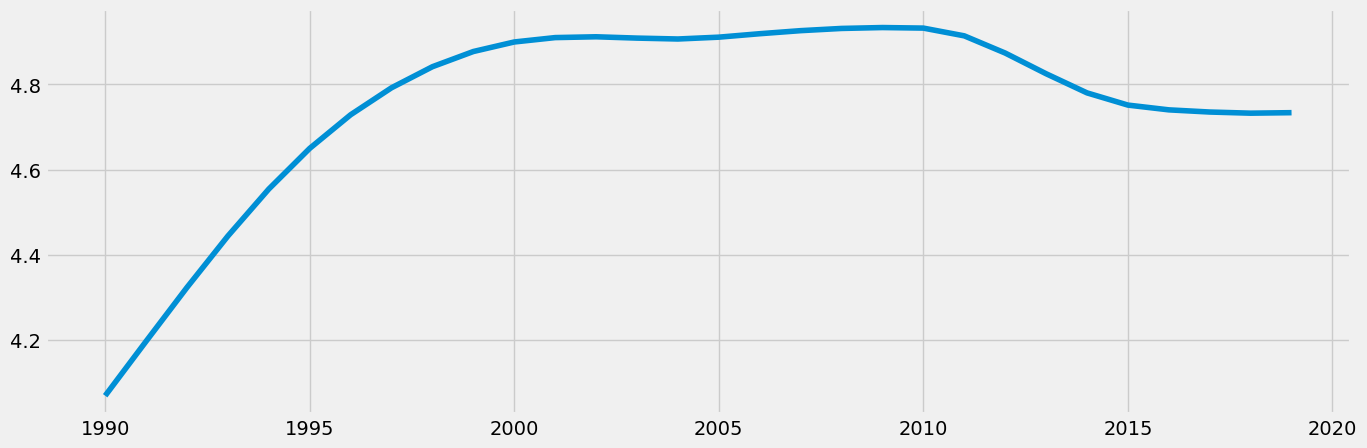

In [14]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(prev_dep_us)

### 2. Subsetting, wrangling, and cleaning time-series data

In [15]:
# resetting index to use Year column as a filter

prev_dep_us2 = prev_dep_us.reset_index()

In [16]:
prev_dep_us2.head()

,Year,Depressive
0,1990,4.0687
1,1991,4.1966
2,1992,4.3232
3,1993,4.4440
4,1994,4.5544


In [17]:
# checking for missing values

prev_dep_us2.isnull().sum() 

Year          0
Depressive    0
dtype: int64

In [18]:
# checking for duplicates

dups = prev_dep_us2.duplicated()
dups.sum()

0

In [19]:
# converting 'year' column to datetime
prev_dep_us2['Year'] = pd.to_datetime(prev_dep_us2['Year'], format='%Y')

In [20]:
# turning Year column into index 

prev_dep_us2.set_index('Year', inplace=True)

In [35]:
prev_dep_us2

,Depressive
Year,
1990-01-01,4.0687
1991-01-01,4.1966
1992-01-01,4.3232
1993-01-01,4.4440
1994-01-01,4.5544
1995-01-01,4.6499
1996-01-01,4.7289
1997-01-01,4.7923
1998-01-01,4.8418


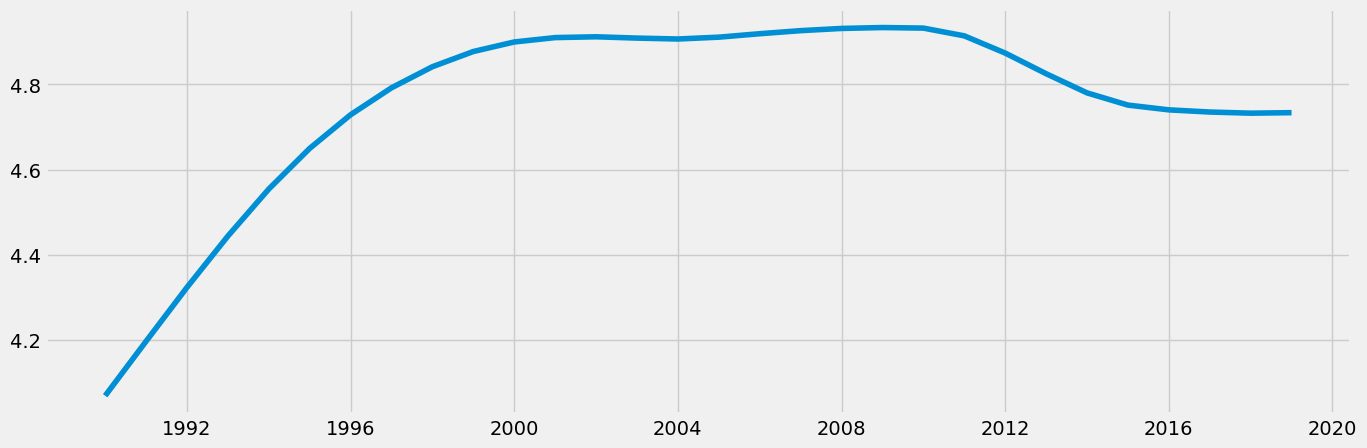

In [22]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(prev_dep_us2)

### 3. Time series analysis: decomposition

In [23]:
# decomposing the time-series using an additive model

decomposition = sm.tsa.seasonal_decompose(prev_dep_us2, model='additive')

In [24]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

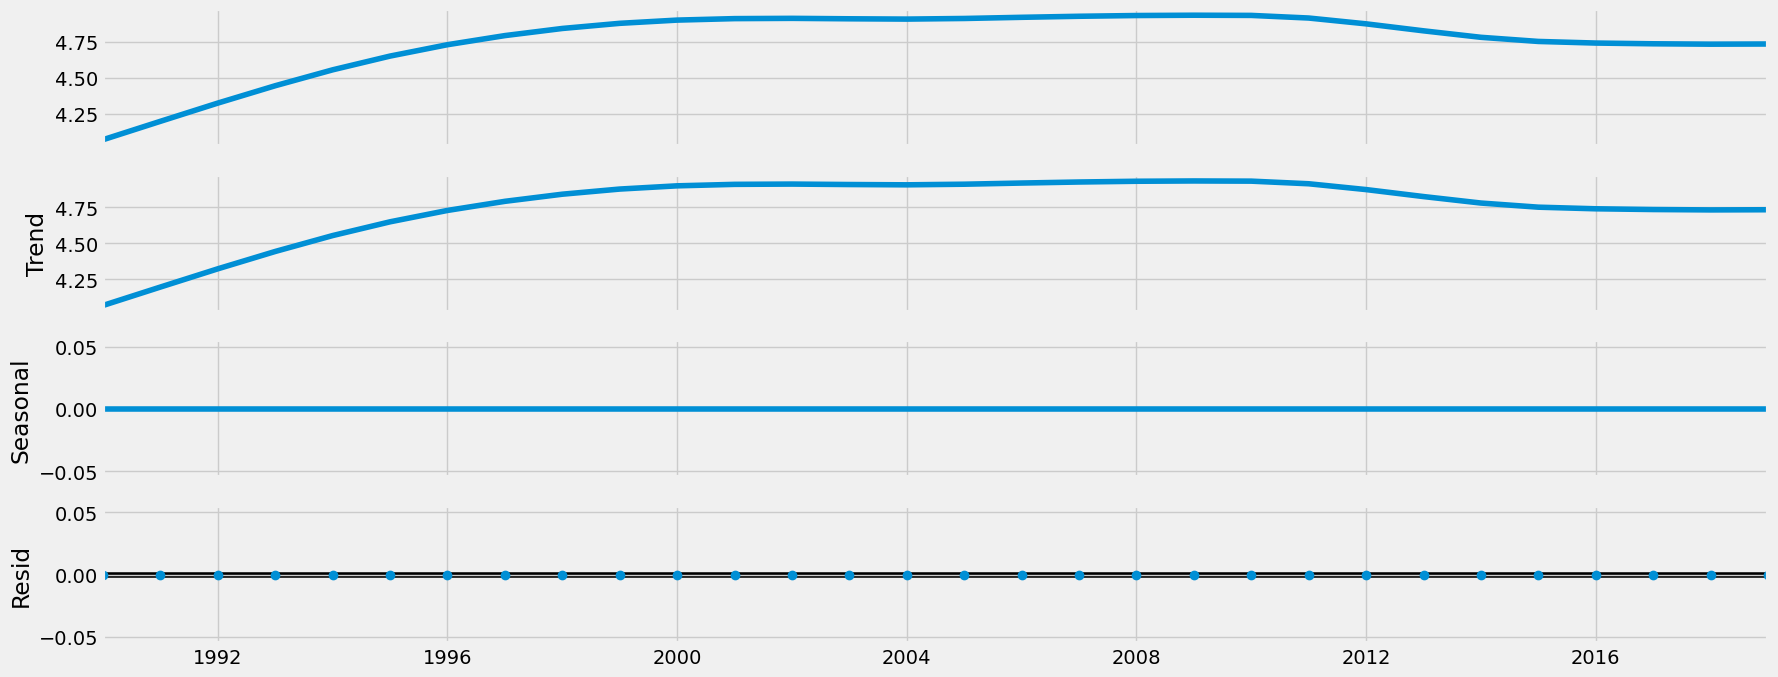

In [25]:
# Plot the separate components

decomposition.plot()
plt.show()

Trend: Gradual increase from 1990 to 2000, platueau to 2011, a slight decrease to 2015 and a plateau to 2019

Seasonality: none because there is no finer granularity like quarterly/monthly data

Residual: none

### 4. Testing for stationarity

In [26]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(prev_dep_us2['Depressive'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.829538
p-value                         0.365899
Number of Lags Used             7.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64


We want to reject the null hypothesis, or disprove the presense of unit root, to prove that the data is stationary, in order to proceed with the forecast. 

Because the test statistic is larger than the critical value (1, 5, and 10%) the null hypothesis cannot be rejected. This means there is a unit root in the data and the dataset is non-stationary. 

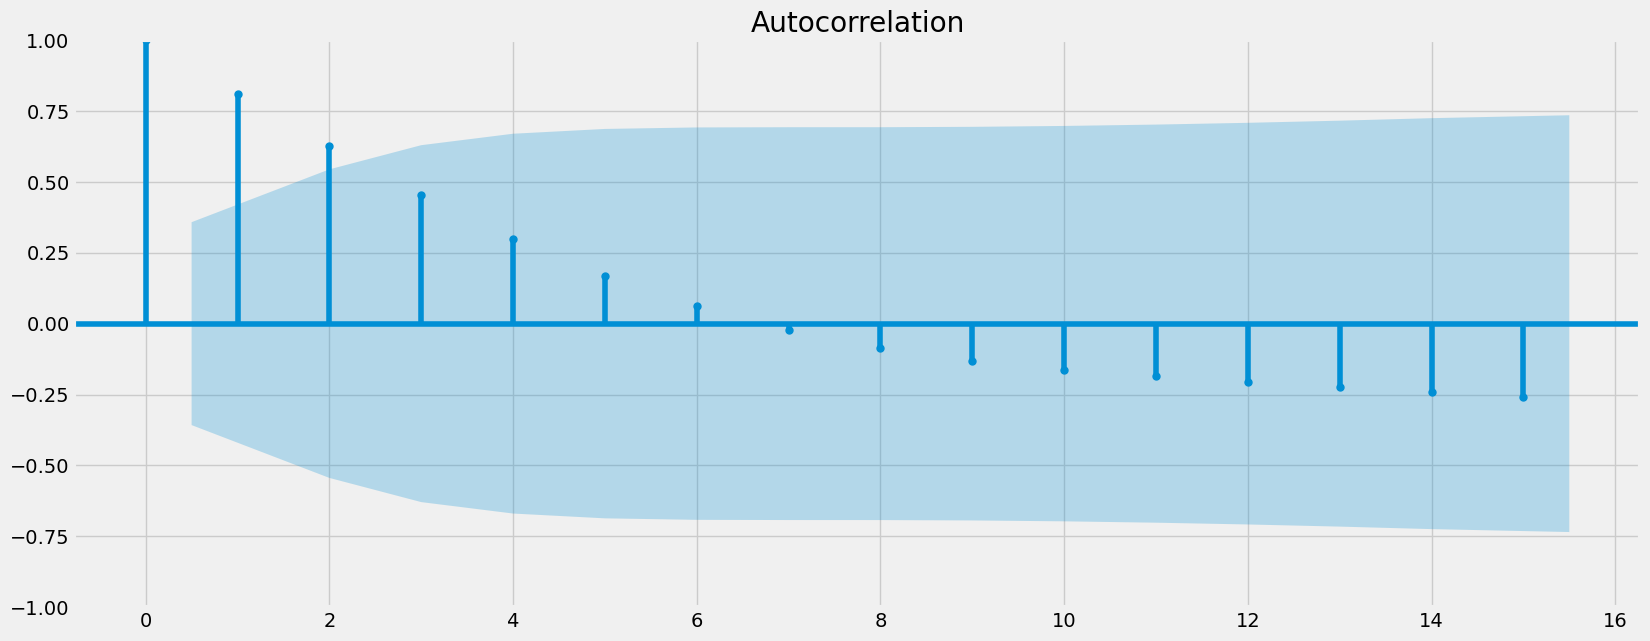

In [27]:
# another way to test if data is stationary or non-stationary is by testing autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(prev_dep_us2)
plt.show()

"The vertical lines represent the lags in the series, while the blue area represents the confidence interval. When lines go above the blue edge of the confidence interval, this means you have lags that are significantly correlated with each other and when you have many lags beyond this interval, you can deduce that your data is non-stationary. (Depressive) time-series has a couple of lags correlated with each other. This means there’s autocorrelated data and the set is likely non-stationary, which supports the result of the Dickey-Fuller test." ...although there are only three lags outside of the confidence interval?

### 5. Stationarizing the Data

In [28]:
prev_diff = prev_dep_us2 - prev_dep_us2.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [29]:
prev_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [30]:
prev_diff.head()

,Depressive
Year,
1991-01-01,0.1279
1992-01-01,0.1266
1993-01-01,0.1208
1994-01-01,0.1104
1995-01-01,0.0955


In [31]:
prev_diff.columns

Index(['Depressive'], dtype='object')

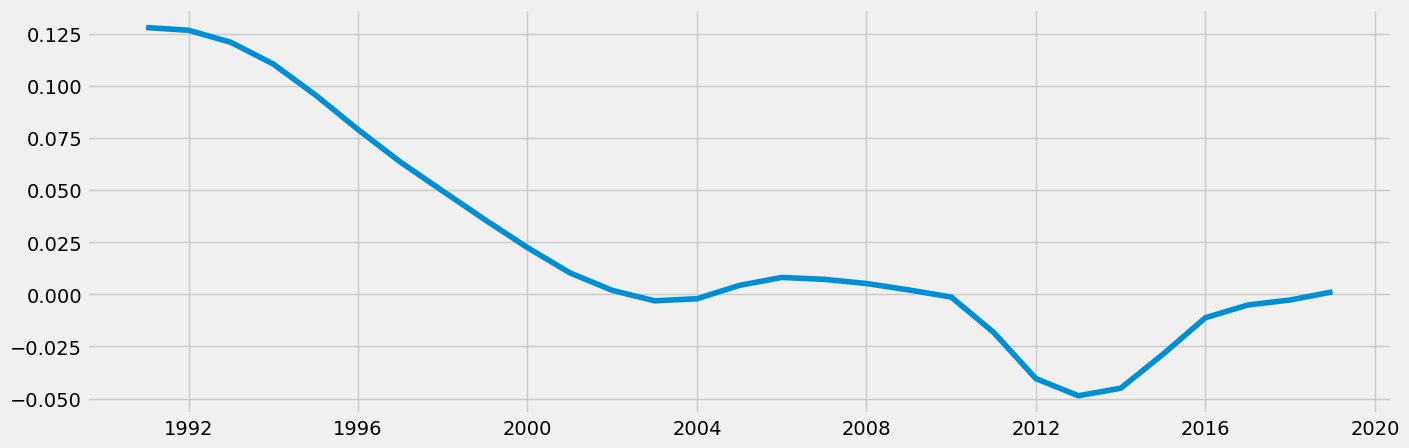

In [32]:
# seeing what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(prev_diff)

In [33]:
dickey_fuller(prev_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -3.098162
p-value                         0.026690
Number of Lags Used             6.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64


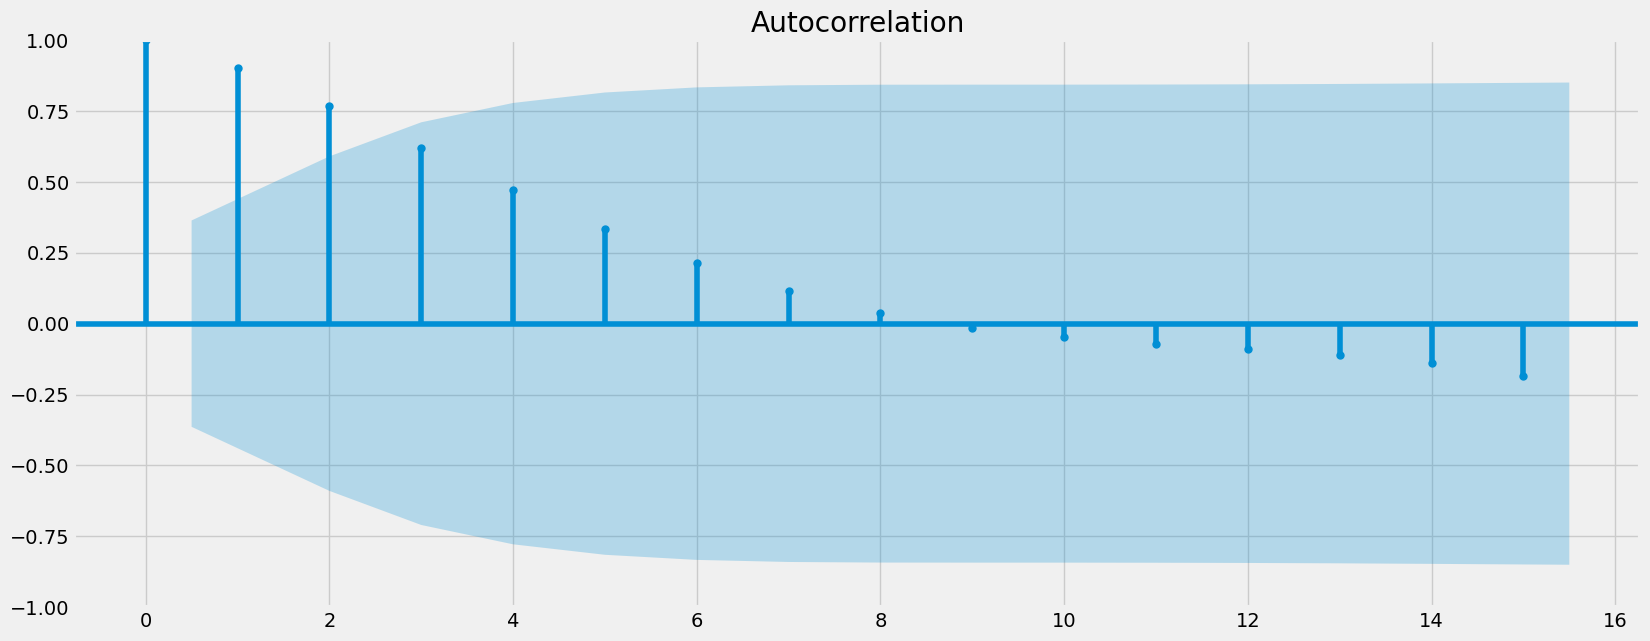

In [34]:
plot_acf(prev_diff)
plt.show()

Differencing made the test statistic smaller than the 5% and 10% critical value (still larger than 1%) but the autocorrelation looks identical, with the same three lags outside of the confidence interval. 